# Data Description :

* The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

* Attribute Information:

* Age    : Age of patient at time of operation (numerical)
* Year   : Patient's year of operation (year - 1900, numerical)
* Nodes  : Number of positive axillary nodes detected (numerical)
* Status : Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

# Objective

* The objective is to determine the factors which influence the survival of cancer patients among the various featues like:
* AGE ,YEAR ,NODES and STATUS
* We are required to find out if only one of the above features play a moajore role or are there any underlying connections in between these factors

# Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the dataset

In [2]:
df = pd.read_csv('haberman.csv')
df.head(4)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1


# EDA

In [62]:
# No of data rows and columns in the dataset

# print('The no of rows and columns in the dataset is :', df.shape)

print('The no of rows in the dataset is :', df.shape[0])
print('The no of columns in the dataset is :', df.shape[1])

# Here 0 = rows and 1 = columns as used by python syntax

The no of rows in the dataset is : 306
The no of columns in the dataset is : 4


In [34]:
# Names of columns :

print('The columns in the dataset are :', df.columns)

The columns in the dataset are : Index(['age', 'year', 'nodes', 'status'], dtype='object')


# Dealing with the status column

* we use the pandas pd.get_dummies method to change the variables into boolean values for easier calculation and interpretation
* Where 
*  0 = Survived
*  1 = Deceased

In [3]:
df['status'] = pd.get_dummies(df.status , drop_first=True)

In [4]:
# No of unique variables in status column

print('The Unique variables in the status column are :\n', df.status.value_counts())

# Where 
# 0 = Survived
# 1 = Deceased

The Unique variables in the status column are :
 0    225
1     81
Name: status, dtype: int64


In [40]:
# No of counts of each datapoints in nodes column

print('The counts of each unique datapoints in the node columns are : \n ',df.nodes.value_counts())

The counts of each unique datapoints in the node columns are : 
  0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64


In [28]:
# Determining the no of unique variables in the nodes column

print('The no of unique datapoints in the node columns are : ', df['nodes'].nunique())

The no of unique datapoints in the node columns are :  31


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [43]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


From the above tabel these are the inferences that we can make :-

1. The mean age of the patients is aroung 52

2. The average no of nodes is around 4

3.  For the Age column

 - 25 precentile of the patients age are less than or equal 44
 - 50 precentile of the patients age are less than or equal 52
 - 75 precentile of the patients age are less than or equal 60


4.  For the Nodes column

 - 25 precentile of the patients cancer nodes numbers are less than or equal 0
 - 50 precentile of the patients cancer nodes numbers are less than or equal 1
 - 75 precentile of the patients cancer nodes numbers are less than or equal 4
   

# Univariate analysis

## PDF

In [73]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

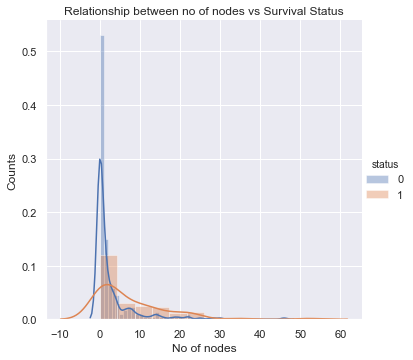

In [16]:
# Checking out the realtionship between the no of nodes and the survial status

sns.FacetGrid(data = df , hue = 'status', height = 5) \
    .map(sns.distplot , 'nodes') \
    .add_legend()
plt.title('Relationship between no of nodes vs Survival Status')
plt.ylabel('Counts')
plt.xlabel('No of nodes')
plt.show()

- From the above graph we can clearly determine that as the no of nodes increases the chances of survival also decreases drastically.

- Roughly, when the no of nodes are less then/equal to 5 , the chances of survival are pretty high.

- Roughly, the patients whose nodes lie between 0 to 5 have a survival rate of 30 %


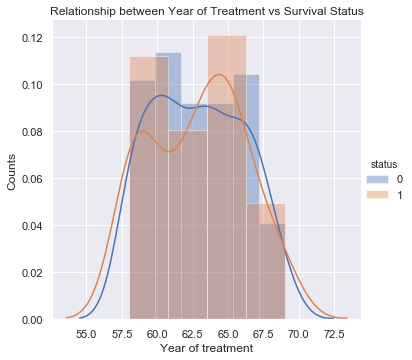

In [70]:
# Checking out the realtionship between the year of treatment and the survial status

sns.FacetGrid(data = df , hue = 'status', height = 5) \
    .map(sns.distplot , 'year') \
    .add_legend()
plt.title('Relationship between Year of Treatment vs Survival Status')
plt.ylabel('Counts')
plt.xlabel('Year of treatment')
plt.show()

- From the above graph we can see that year of treatment dosen't play a much significant role in determing the survial rates of patients

- Thue Year cannot be considered a determining factor on the determination of the survival rates of patients.

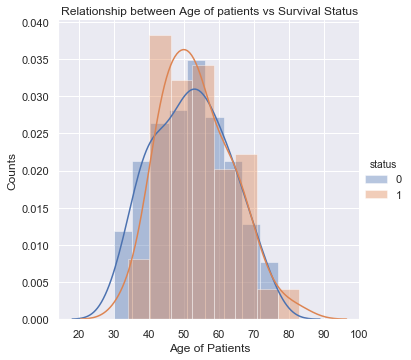

In [17]:
# Checking out the realtionship between the age of patient and the survial status

sns.FacetGrid(data = df , hue = 'status', height = 5) \
    .map(sns.distplot , 'age') \
    .add_legend()
plt.title('Relationship between Age of patients vs Survival Status')
plt.ylabel('Counts')
plt.xlabel('Age of Patients')
plt.show()

- From the above graph we can similarly see that there is no specific age bar where the patient did or did not survive.
- Thus Age cannot be considered a determining factor on the determination of the survival rates of patients.

# Calculating  CDF for all the features

- i.e Age, Year and nodes

[0.14831574 0.0188537  0.01131222 0.00502765 0.00565611 0.00125691
 0.00062846 0.         0.00062846 0.00062846]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.00986558 0.01664817 0.02836355 0.03267974 0.03391294 0.02528055
 0.02528055 0.01109878 0.00431619 0.0012332 ]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.18716578 0.08318479 0.07724302 0.06833036 0.08912656 0.09209745
 0.08318479 0.08318479 0.07427213 0.07130125]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


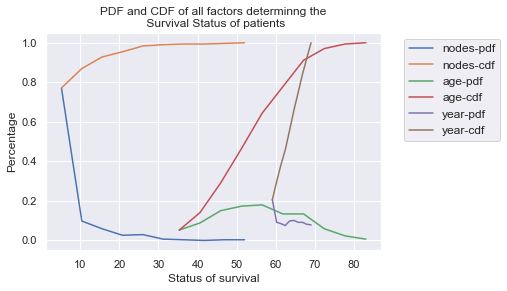

In [118]:
# ********** For Nodes **********


counts,bin_edges = np.histogram(df['nodes'], bins = 10 , density = True)

# calucalting the pdf

pdf = counts/sum(counts)
print(counts)
print(bin_edges)

# Calculating the cdf 

cdf = np.cumsum(pdf)

# plotting the PDF and CDF

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)



# ********** For age **********


counts,bin_edges = np.histogram(df['age'], bins = 10 , density = True)

# calucalting the pdf

pdf = counts/sum(counts)
print(counts)
print(bin_edges)

# Calculating the cdf 

cdf = np.cumsum(pdf)

# plotting the PDF and CDF

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)



# ********** For Year **********


counts,bin_edges = np.histogram(df['year'], bins = 10 , density = True)

# calucalting the pdf

pdf = counts/sum(counts)
print(counts)
print(bin_edges)

# Calculating the cdf 

cdf = np.cumsum(pdf)

# plotting the PDF and CDF

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# plt.legend(['nodes-pdf', 'nodes-cdf', 'age-pdf', 'age-cdf', 'year-pdf', 'year-cdf'],loc = [.2,.3])

# plt.legend(['nodes-pdf', 'nodes-cdf', 'age-pdf', 'age-cdf', 'year-pdf', 'year-cdf'],loc = [1,.2], fontsize = 'large')

plt.legend(['nodes-pdf', 'nodes-cdf', 'age-pdf', 'age-cdf', 'year-pdf', 'year-cdf'],loc = 'best', fontsize = 'large',bbox_to_anchor=(1.05, 1))
plt.title('PDF and CDF of all factors determinng the\n Survival Status of patients')
plt.xlabel('Status of survival')
plt.ylabel('Percentage')

plt.show()

For changing the position of the legend i have used the loc parameter and applied custom co-odrinates to find the best position via trial and error

* The link your team provide on the procedure to add legends was also useful 'https://imgur.com/fpJz2oP'

* This is the youtube link i went through to learn how to set custom parameters for the legends 'https://www.youtube.com/watch?v=UjRcLkIuxjk'     
timestamp : 9.20

- Blue   =   Survived
- Orange = Did not survive

### From the nodes cdf we can infer the following

 - 80 % of the patients have nodes (less than or equal to) <= 7
 - 15 % of the patients have nodes <= 20
 -  3 % of the patients have nodes <= 25
 
### From the age cdf we can infer the following

 -  8  % probability patients age is <= 40
 -  42 % probability patients age is <= 50
 -  42 % probability patients age is <= 60
 -  95 % probability patients age is <= 70
 -  77 % probability patients age lies between 50 to 60 

### From the year cfd we can infer the following

 - The probability of operations in year 1962 is around 45 %
 - The probability of operations in year 1964 is around 60 %
 - The probability of operations in year 1966 is around 78 %
 - Thus rought we can state that with the advancement of years the probabilty of people going for treatments increases
 





# Mean,Variance and Std.dev 

In [138]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [139]:
print('The mean of nodes is :',np.mean(df.nodes))
print('The mean of age is :',np.mean(df.age))
print('The mean of status is :',np.mean(df.status))
print('The mean of year is :',np.mean(df.year))
print(' \n')
# Std

print('The std. of nodes is :' , np.std(df.nodes))
print('The std. of age is :' , np.std(df.age))
print('The std. of status is :' , np.std(df.status))
print('The std. of year is :' , np.std(df.year))
print(' \n')

# variance
print('The variance of nodes is :' , np.var(df.nodes))
print('The variance of age is :' , np.var(df.age))
print('The variance of status is :' , np.var(df.status))
print('The variance of year is :' , np.var(df.year))
print(' \n')

The mean of nodes is : 4.026143790849673
The mean of age is : 52.45751633986928
The mean of status is : 0.2647058823529412
The mean of year is : 62.85294117647059
 

The std. of nodes is : 7.177896092811152
The std. of age is : 10.78578520363183
The std. of status is : 0.4411764705882353
The std. of year is : 3.244090833563246
 

The variance of nodes is : 51.52219231919361
The variance of age is : 116.33316245888332
The variance of status is : 0.19463667820069205
The variance of year is : 10.524125336409075
 



# Median and MAD (Median Absolute Deviation)

In [140]:
print('The median of nodes is :', np.median(df.nodes))
print('The median of age is :', np.median(df.age))
print('The median of status is :', np.median(df.status))
print('The median of year is :', np.median(df.year))
print(' \n')

# For MAD

from statsmodels import robust

print('The MAD value for nodes is :',robust.mad(df.nodes))
print('The MAD value for status is :',robust.mad(df.age))
print('The MAD value for age is :',robust.mad(df.status))
print('The MAD value for year is :',robust.mad(df.year))

The median of nodes is : 1.0
The median of age is : 52.0
The median of status is : 0.0
The median of year is : 63.0
 

The MAD value for nodes is : 1.482602218505602
The MAD value for status is : 11.860817748044816
The MAD value for age is : 0.0
The MAD value for year is : 4.447806655516806


# BOX Plot

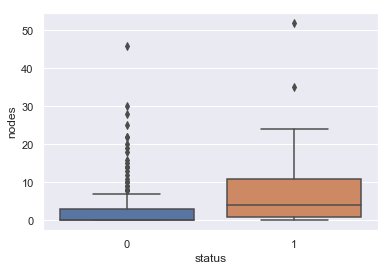

In [126]:
sns.boxplot(x='status' ,y= 'nodes',data =df );

From the Box plot above , we can infer that-
 - 50 percentile of people with node values under 3 have survived
 - 50 percentile of people with node values between 0 to 11 did not survive
 - Most of the patients who survied have node in range of 0 to 6 


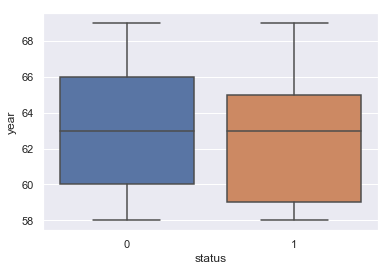

In [61]:
sns.boxplot(x='status' ,y= 'year',data =df );

From the above box plot,we can infer that
 -  50 precentile of people under the age group of 60 to 66 have survived
 -  50 percentile of people between the age group of 55 to 64 did not survive


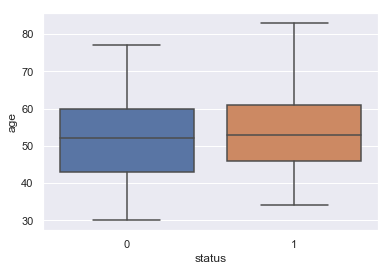

In [62]:
sns.boxplot(x='status' ,y= 'age',data =df );

# Boxplot view of all the features 

[]

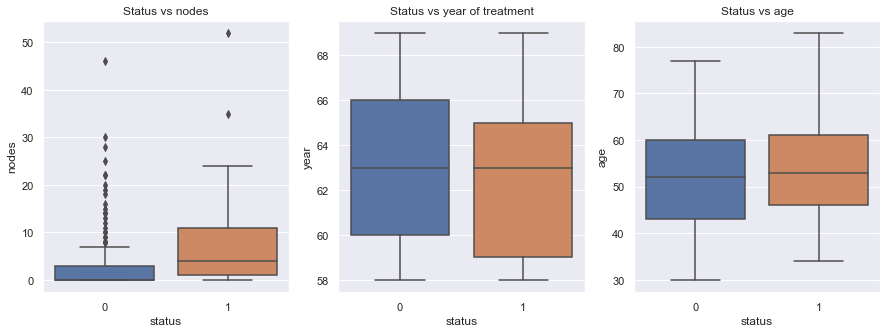

In [125]:
plt.figure(1, figsize = (15,5))

plt.subplot(131)
sns.boxplot(x='status' ,y= 'nodes',data =df )
plt.title('Status vs nodes')

plt.subplot(132)
sns.boxplot(x='status' ,y= 'year',data =df )
plt.title('Status vs year of treatment')


plt.subplot(133)
sns.boxplot(x='status' ,y= 'age',data =df )
plt.title('Status vs age')

plt.plot()

From the above box plots, we can infer that -
 - 50 percentile of people that survied are between the age groups of 43 to 60
 - Most of the patients who survived have their age in range of 30 to 78
 - 50 percentile of people who did not survive are between age groups of 45 to 62
 - The probability of a paitent survivng after getting treatment after 1965 is significant
 - The probability of a patient dying at higher age is significantly higher 

# Violin Plots

### With 3 saperate figures

[]

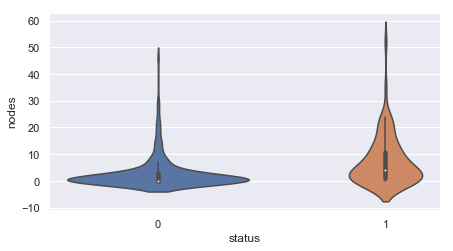

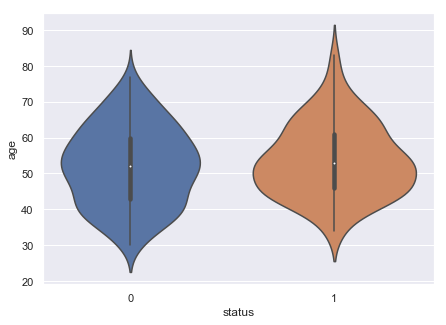

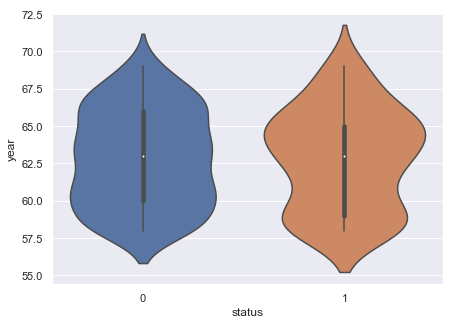

In [67]:
plt.figure(1, figsize = (7,8))
plt.subplot(211)
sns.violinplot(x = 'status' ,y = 'nodes' ,data =df )
plt.plot()

plt.figure(2, figsize = (7,5))
#plt.subplot(211)
sns.violinplot(x = 'status', y = 'age', data = df)
plt.plot()

plt.figure(3 , figsize = (7,5))
#plt.subplot(211)
sns.violinplot(x = 'status', y = 'year', data = df)
plt.plot()

#  with 3 subfigures

[]

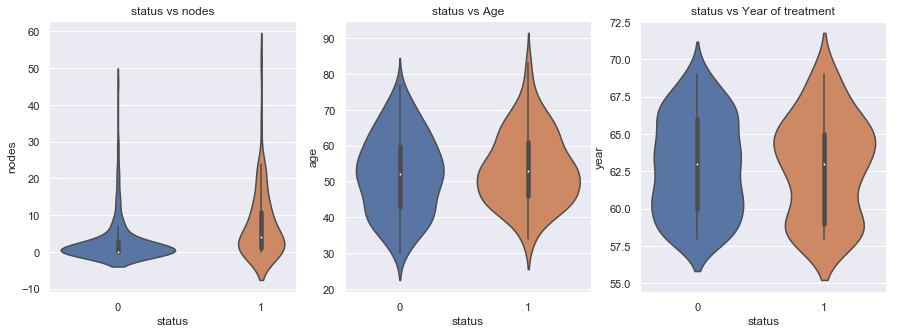

In [217]:
plt.figure(1 , figsize= (15,5))
plt.subplot(131)
sns.violinplot(x = 'status' ,y = 'nodes' ,data =df )
plt.title('status vs nodes')
plt.plot()


plt.subplot(132)
sns.violinplot(x = 'status', y = 'age', data = df)
plt.title('status vs Age')
plt.plot()


plt.subplot(133)
sns.violinplot(x = 'status', y = 'year', data = df)
plt.title('status vs Year of treatment')
plt.plot()

# Conclusions -

 - The no of nodes of the survivors is mainly spread in range of 0 to 5
 - The fatality of patients is more dense in between age groups of 44 to 52 and higher age play a role on the probability of    survival
 - The patients getting treatment after 1965 have a slightly greater chance of surviving

# Multivariate Analysis

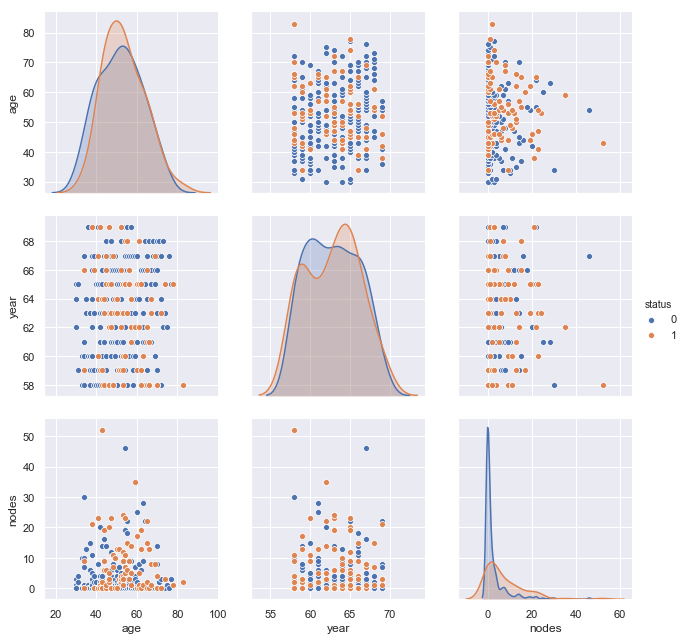

In [8]:
sns.pairplot(df, height=3,vars=['age', 'year', 'nodes'],hue = 'status')

Unable to spot any relevant relationships between the features

* Note - I learnt of the method(pd.get_dummies())   in an earlier course that i had undertaken on the month of dec and jan on the basics of data analysis. The name of the course is 'Python for Data Science and Machine Learning Bootcamp' by Jose Portilla.

* For changing the position of the legend i have used the loc parameter and applied custom co-odrinates to find the best position via trial and error

* The link your team provided on the procedure to add legends to cdf and pdf  was also useful 'https://imgur.com/fpJz2oP'

* This is the youtube link i went through to learn how to set custom parameters for the legends 'https://www.youtube.com/watch?v=UjRcLkIuxjk'     
timestamp : 9.20

* Please correct any wrongs i might have committed. THANK YOU very much for the continued support and guidance


*A question i would like to add is how to add legends in box plots ?

* i found out this link ('https://stackoverflow.com/questions/47528955/adding-a-legend-to-a-matplotlib-boxplot-with-multiple-plots-on-same-axes') and when i tried to do it in a similar way i got an error. I have posted my trial code below for your review  


plt.figure(1, figsize = (15,5))

plt.subplot(131)
bp1 =sns.boxplot(x='status' ,y= 'nodes',data =df )
plt.title('Status vs nodes')

plt.subplot(132)
bp2 = sns.boxplot(x='status' ,y= 'year',data =df )
plt.title('Status vs year of treatment')

plt.subplot(133)
bp3 = sns.boxplot(x='status' ,y= 'age',data =df )
plt.title('Status vs age')
plt.legend([bp1["boxes"][0], bp2["boxes"][0],bp3["boxes"][0] ], ['Survived', 'Did not survive'], loc='upper right')

plt.plot()